In [2]:
import numpy as np
import pandas as pd
import seaborn as sns

In [3]:
pet_dict = {
    "dogs": {"samples": 47, 
             "height": {"mean": 20, "std": 18}, 
             "bmi": {"mean": 95, "std": 10}, 
             # weight = BMI * height**2
             "has_fur" : {"threshold": 0.1},
             "likes_belly_rubs" : {"threshold": 0.4},
             "likes_balls" : {"threshold": 0.4},
              },   
    "cats": {"samples": 41, 
             "height": {"mean": 9, "std": 5}, 
             "bmi": {"mean": 95, "std": 10}, 
             # weight = BMI * height**2
             "has_fur" : {"threshold": 0.2},
             "likes_belly_rubs" : {"threshold": 0.9},
             "likes_balls" : {"threshold": 0.8},
              },
    "snakes": {"samples": 12, 
             "height": {"mean": 30, "std": 15}, 
             "weight": {"mean": 0.5, "std": 0.2}, 
             "has_fur" : {"threshold": 1},
             "likes_belly_rubs" : {"threshold": 0.8},
             "likes_balls" : {"threshold": 0.7},
              }
}

In [4]:
pet_dfs = []
for pet_type in pet_dict:
    print(pet_type)
    number_samples = pet_dict[pet_type]["samples"]
    pet_type_dict = pet_dict[pet_type]

    def get_normal_values(normal_value_params, number_samples):
        raw_random = np.random.normal(normal_value_params['mean'], 
                                normal_value_params['std'], 
                                number_samples)
        return [abs(i) for i in raw_random]

    def get_threshold_value(threshold_dict, number_samples):
        return [i > threshold_dict['threshold'] for i in np.random.rand(number_samples)]

    heights = get_normal_values(pet_type_dict['height'], number_samples)

    if pet_type == "snakes":
        weights = get_normal_values(pet_type_dict['weight'], number_samples) 

    else: 
        weights = [height * np.random.uniform(2, 3.25) for  height in heights]

    has_furs = get_threshold_value(pet_type_dict['has_fur'], number_samples)
    likes_belly_rubs = get_threshold_value(pet_type_dict['likes_belly_rubs'], number_samples)
    likes_balls = get_threshold_value(pet_type_dict['likes_balls'], number_samples)

    temp_df = pd.DataFrame(np.array([heights, weights, has_furs, likes_belly_rubs, likes_balls]).T, 
             columns=['height', 'weight', 'has_fur', 'likes_belly_rubs', 'likes_balls'] )

    temp_df['pet_type'] = pet_type
    temp_df['is_dog'] = pet_type == "dogs"
    
    pet_dfs.append(temp_df)


dogs
cats
snakes


In [5]:
pet_df = pd.concat(pet_dfs)


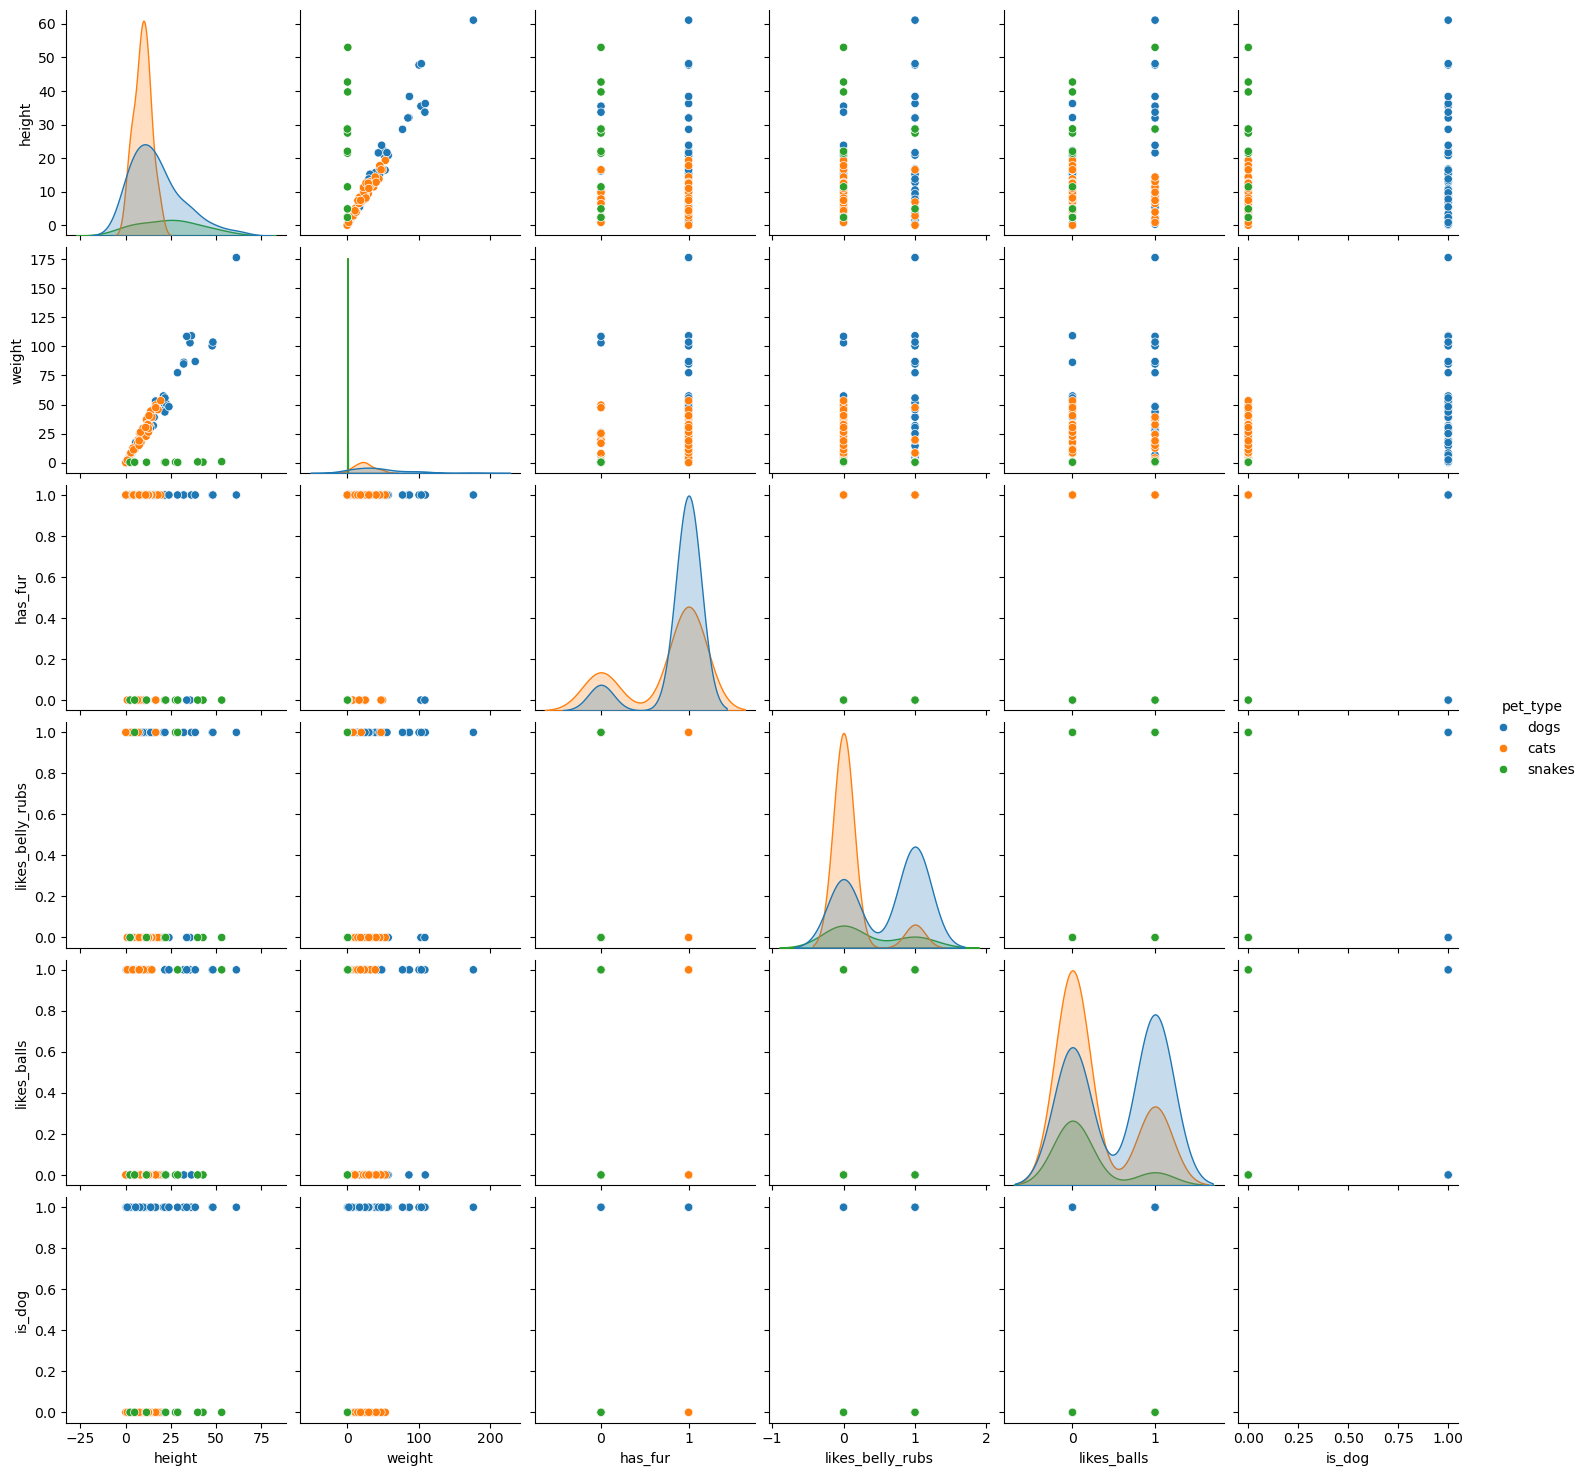

In [6]:
sns.pairplot(pet_df, hue="pet_type")

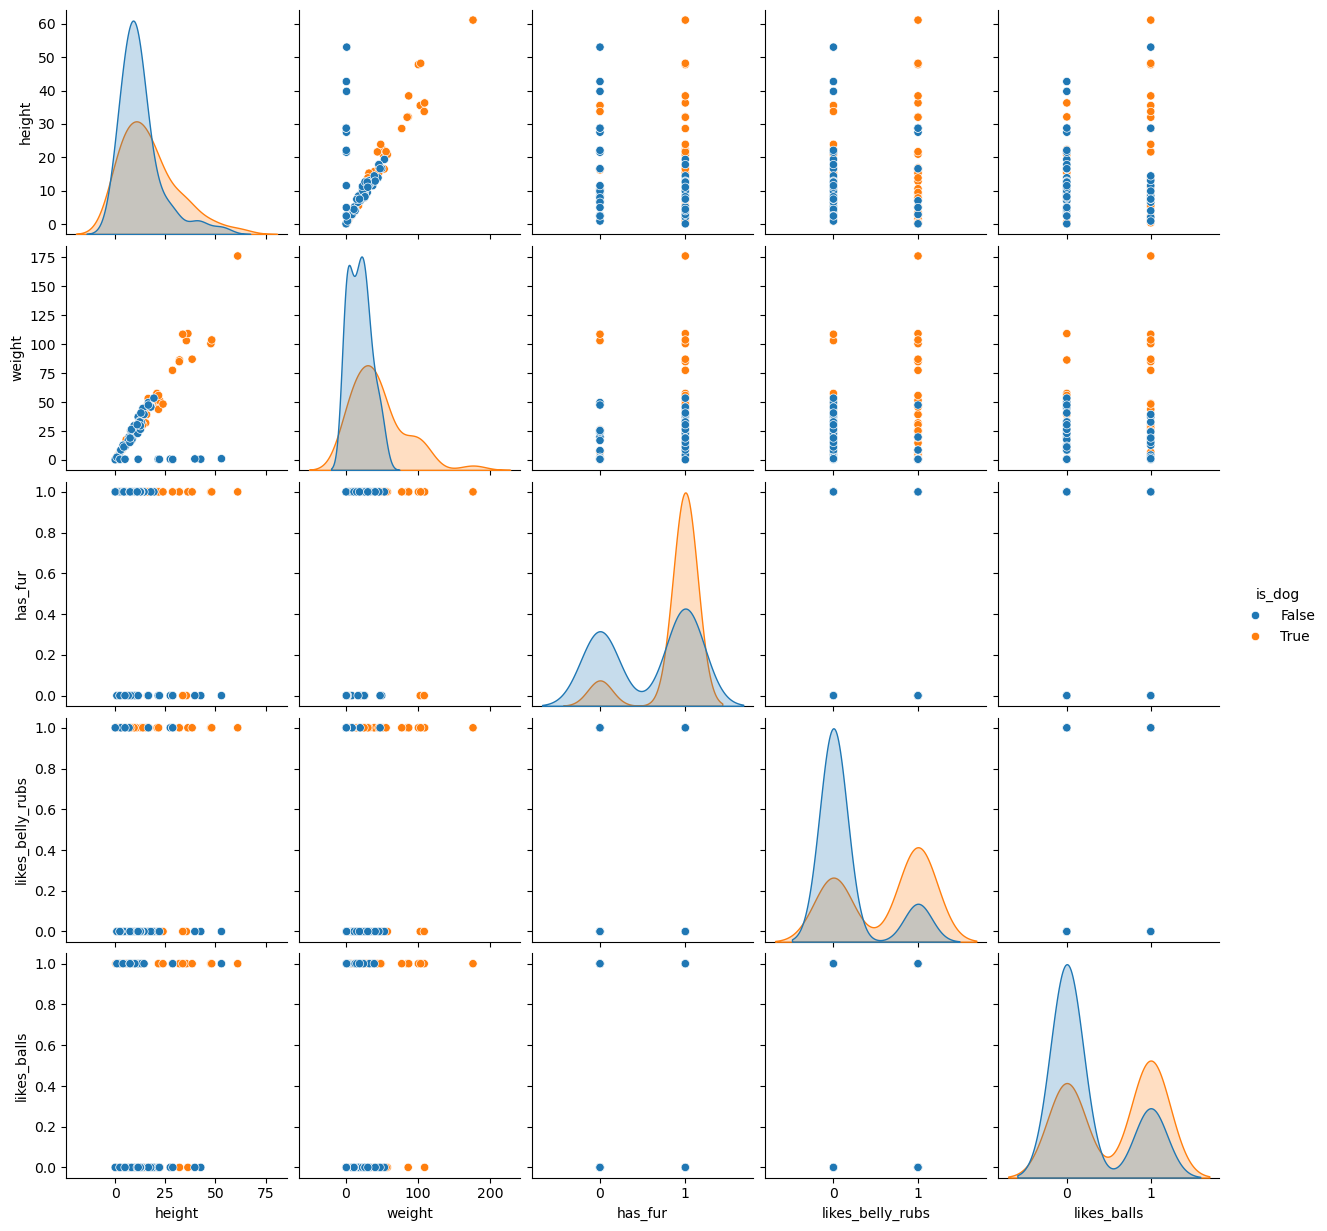

In [7]:
sns.pairplot(pet_df, hue="is_dog")

In [8]:
pet_df.loc[0, 'likes_balls'] = 0

In [16]:
pet_df.tail(4)

,height,weight,has_fur,likes_belly_rubs,likes_balls,pet_type,is_dog
8,11.492447,0.479632,0.0,0.0,0.0,snakes,False
9,39.743082,0.799158,0.0,0.0,0.0,snakes,False
10,53.008169,0.996412,0.0,0.0,1.0,snakes,False
11,4.931900,0.509283,0.0,1.0,0.0,snakes,False


In [18]:
pet_test_dict = [{  'height': 16.208129807791916,
                    'weight': 56.92075329515124,
                    'has_fur': 1.0,
                    'likes_belly_rubs': 1.0,
                    'likes_balls': 1.0,
                    'pet_type': 'dogs',
                    'is_dog': True},
                        {'height': 8.79261129277242,
                        'weight': 24.015846679771748,
                        'has_fur': 1.0,
                        'likes_belly_rubs': 1.0,
                        'likes_balls': 0.0,
                        'pet_type': 'dogs',
                        'is_dog': True},
                            {'height': 9.2145907703296426,
                            'weight': 20.9114064644542736,
                            'has_fur': 1.0,
                            'likes_belly_rubs': 0.0,
                            'likes_balls': 1.0,
                            'pet_type': 'cats',
                            'is_dog': False},
                                {'height': 11.492447,
                                'weight': 0.479632,
                                'has_fur': 0.0,
                                'likes_belly_rubs': 0.0,
                                'likes_balls': 0.0,
                                'pet_type': 'snakes',
                                'is_dog': False}]

In [19]:
pet_test_df = pd.DataFrame(pet_test_dict)
pet_test_df

,height,weight,has_fur,likes_belly_rubs,likes_balls,pet_type,is_dog
0,16.208130,56.920753,1.0,1.0,1.0,dogs,True
1,8.792611,24.015847,1.0,1.0,0.0,dogs,True
2,9.214591,20.911406,1.0,0.0,1.0,cats,False
3,11.492447,0.479632,0.0,0.0,0.0,snakes,False


In [20]:
pet_test_df.to_csv("pet_test.csv", index=False)